# Loan predictions

## Problem Statement

We want to automate the loan eligibility process based on customer details that are provided as online application forms are being filled. You can find the dataset [here](https://drive.google.com/file/d/1h_jl9xqqqHflI5PsuiQd_soNYxzFfjKw/view?usp=sharing). These details concern the customer's Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and other things as well. 

|Variable| Description|
|: ------------- |:-------------|
|Loan_ID| Unique Loan ID|
|Gender| Male/ Female|
|Married| Applicant married (Y/N)|
|Dependents| Number of dependents|
|Education| Applicant Education (Graduate/ Under Graduate)|
|Self_Employed| Self employed (Y/N)|
|ApplicantIncome| Applicant income|
|CoapplicantIncome| Coapplicant income|
|LoanAmount| Loan amount in thousands|
|Loan_Amount_Term| Term of loan in months|
|Credit_History| credit history meets guidelines|
|Property_Area| Urban/ Semi Urban/ Rural|
|Loan_Status| Loan approved (Y/N)



### Explore the problem in following stages:

1. Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome
2. Data Exploration – looking at categorical and continuous feature summaries and making inferences about the data.
3. Data Cleaning – imputing missing values in the data and checking for outliers
4. Feature Engineering – modifying existing variables and creating new ones for analysis
5. Model Building – making predictive models on the data

## 1. Hypothesis Generation

Generating a hypothesis is a major step in the process of analyzing data. This involves understanding the problem and formulating a meaningful hypothesis about what could potentially have a good impact on the outcome. This is done BEFORE looking at the data, and we end up creating a laundry list of the different analyses which we can potentially perform if data is available.

#### Possible hypotheses
Which applicants are more likely to get a loan

1. Applicants having a credit history 
2. Applicants with higher applicant and co-applicant incomes
3. Applicants with higher education level
4. Properties in urban areas with high growth perspectives

Do more brainstorming and create some hypotheses of your own. Remember that the data might not be sufficient to test all of these, but forming these enables a better understanding of the problem.

### My hypothesis
1. Applicants with high credit score
2. If the loan is secured by collateral, such as a home or a vehicle
3. Applicant with small/no debt and credit
4. Applicants with a requested loan that is less than the amount of their assets (home, vehicle, savings accounts...)
5. Applicants with few/no dependents

## 2. Data Exploration
Let's do some basic data exploration here and come up with some inferences about the data. Go ahead and try to figure out some irregularities and address them in the next section. 

In [111]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

#import clining_data as cld
import sys
import missing_valueTable  as mvt
import missing_values  as mv
import future_engin  as fe


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

#algorithms to use
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#Metrics to evaluate the model
from sklearn.metrics import confusion_matrix, classification_report, recall_score
from sklearn import metrics
from sklearn.metrics import accuracy_score

#for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("../data/data.csv") 
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


One of the key challenges in any data set are missing values. Lets start by checking which columns contain missing values.

In [3]:
#Looking at columns and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
# Change data type of ApplicantIncome to float64
df['ApplicantIncome'] = df['ApplicantIncome'].astype(float)

In [6]:
mvt.missing_values_table (df)

                   Missing Values  % of Total Values
Loan_ID                         0           0.000000
Gender                         13           2.117264
Married                         3           0.488599
Dependents                     15           2.442997
Education                       0           0.000000
Self_Employed                  32           5.211726
ApplicantIncome                 0           0.000000
CoapplicantIncome               0           0.000000
LoanAmount                     22           3.583062
Loan_Amount_Term               14           2.280130
Credit_History                 50           8.143322
Property_Area                   0           0.000000
Loan_Status                     0           0.000000


In [7]:
#number of row and column
df.shape

(614, 13)

In [8]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


1. How many applicants have a `Credit_History`? (`Credit_History` has value 1 for those who have a credit history and 0 otherwise)
2. Is the `ApplicantIncome` distribution in line with your expectation? Similarly, what about `CoapplicantIncome`?
3. Tip: Can you see a possible skewness in the data by comparing the mean to the median, i.e. the 50% figure of a feature.



Let's discuss nominal (categorical) variable. Look at the number of unique values in each of them.

In [9]:
# 1. How many applicants have a `Credit_History`? (`Credit_History` has value 1 for those who have a credit history and 0 otherwise)

len(df[df['Credit_History'] == 1])

475

In [10]:
df['Credit_History'].nunique()


2

In [11]:
#2. Is the `ApplicantIncome` distribution in line with your expectation? Similarly, what about `CoapplicantIncome`?

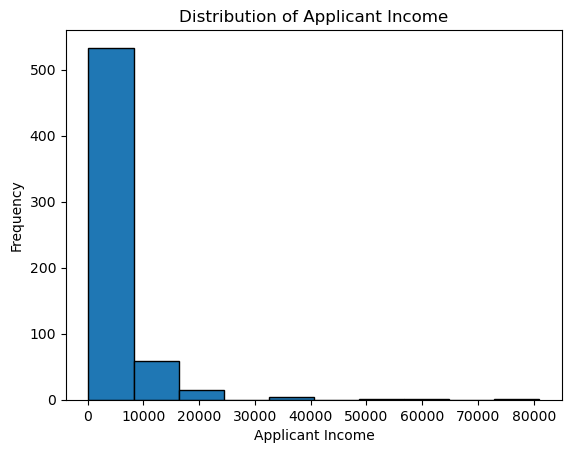

In [12]:
import matplotlib.pyplot as plt

# Plotting the histogram
plt.hist(df['ApplicantIncome'], bins=10, edgecolor='black')

# Adding labels and title
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.title('Distribution of Applicant Income')

# Displaying the plot
plt.show()

In [13]:
df['ApplicantIncome'].describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

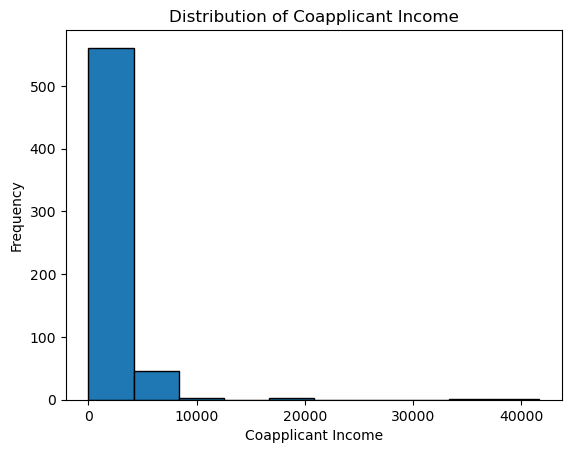

In [14]:
import matplotlib.pyplot as plt

# Plotting the histogram
plt.hist(df['CoapplicantIncome'], bins=10, edgecolor='black')

# Adding labels and title
plt.xlabel('Coapplicant Income')
plt.ylabel('Frequency')
plt.title('Distribution of Coapplicant Income')

# Displaying the plot
plt.show()

In [15]:
df['CoapplicantIncome'].describe()


count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
25%          0.000000
50%       1188.500000
75%       2297.250000
max      41667.000000
Name: CoapplicantIncome, dtype: float64

In [16]:
# 3. Tip: Can you see a possible skewness in the data by comparing the mean to the median, i.e. the 50% figure of a feature.

In [16]:
mean = df['ApplicantIncome'].mean()
median = df['ApplicantIncome'].median()

skewness = mean - median
print(skewness)



1590.9592833876222


In [17]:
mean = df['CoapplicantIncome'].mean()
median = df['CoapplicantIncome'].median()

skewness = mean - median
print(skewness)

432.7457980271008


We can see that the skewness value is positive, it suggests a right-skewed distribution (mean > median).

Explore further using the frequency of different categories in each nominal variable. Exclude the ID obvious reasons.

In [18]:
categorical_columns = df.select_dtypes(include='object').columns.drop('Loan_ID')

for column in categorical_columns:
    unique_values = df[column].unique()
    value_counts = df[column].value_counts()
    print(f"Unique values for {column}:")
    print(unique_values)
    print(f"Value counts for {column}:")
    print(value_counts)


Unique values for Gender:
['Male' 'Female' nan]
Value counts for Gender:
Male      489
Female    112
Name: Gender, dtype: int64
Unique values for Married:
['No' 'Yes' nan]
Value counts for Married:
Yes    398
No     213
Name: Married, dtype: int64
Unique values for Dependents:
['0' '1' '2' '3+' nan]
Value counts for Dependents:
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Unique values for Education:
['Graduate' 'Not Graduate']
Value counts for Education:
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
Unique values for Self_Employed:
['No' 'Yes' nan]
Value counts for Self_Employed:
No     500
Yes     82
Name: Self_Employed, dtype: int64
Unique values for Property_Area:
['Urban' 'Rural' 'Semiurban']
Value counts for Property_Area:
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
Unique values for Loan_Status:
['Y' 'N']
Value counts for Loan_Status:
Y    422
N    192
Name: Loan_Status, dtype: int64


### Distribution analysis

Study distribution of various variables. Plot the histogram of ApplicantIncome, try different number of bins.



<Axes: xlabel='ApplicantIncome', ylabel='Count'>

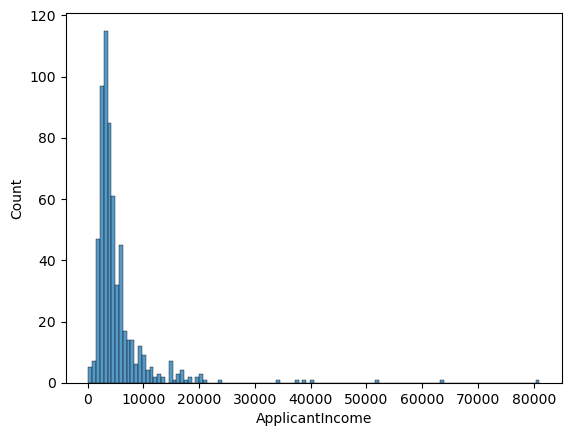

In [19]:

sns.histplot(df['ApplicantIncome'])

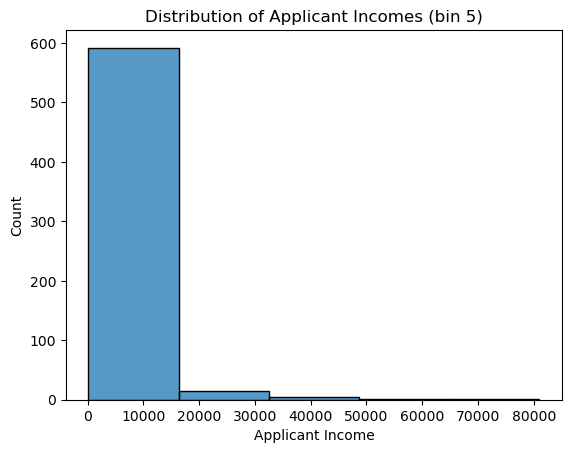

In [20]:

sns.histplot(df['ApplicantIncome'], bins=5)
plt.xlabel('Applicant Income')
plt.title('Distribution of Applicant Incomes (bin 5)')
plt.show()


Look at box plots to understand the distributions. 

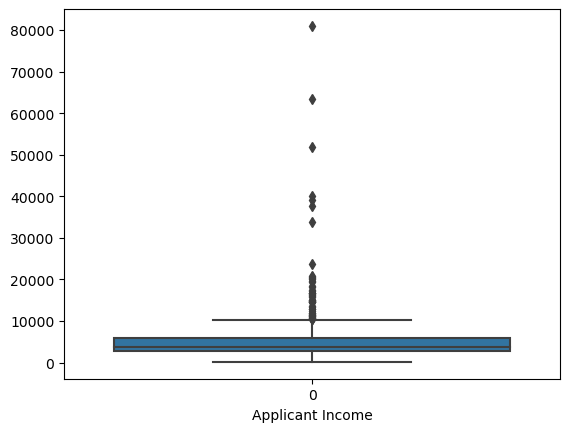

In [21]:
sns.boxplot(df['ApplicantIncome'])
plt.xlabel('Applicant Income')
plt.show()


Look at the distribution of income segregated  by `Education`

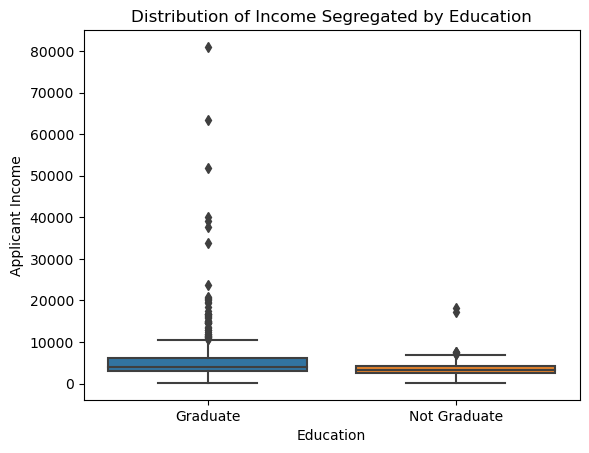

In [22]:

sns.boxplot(data=df, x='Education', y='ApplicantIncome')
plt.xlabel('Education')
plt.ylabel('Applicant Income')
plt.title('Distribution of Income Segregated by Education')
plt.show()

Look at the histogram and boxplot of LoanAmount

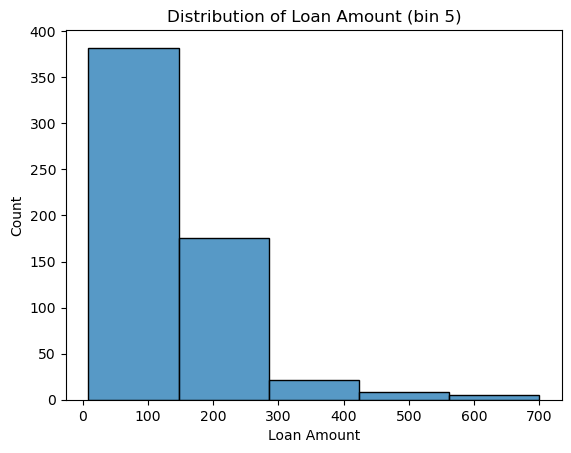

In [23]:
sns.histplot(df['LoanAmount'], bins=5)
plt.xlabel('Loan Amount')
plt.title('Distribution of Loan Amount (bin 5)')
plt.show()

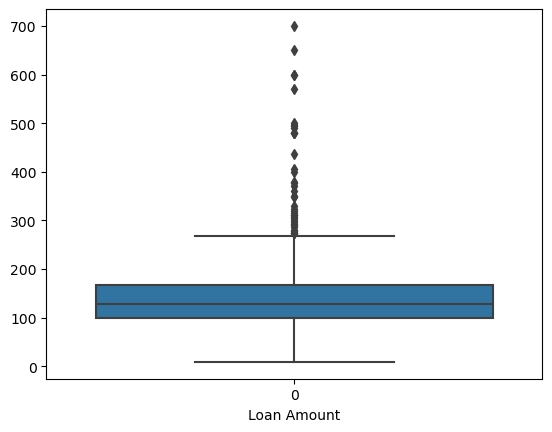

In [24]:
sns.boxplot(df['LoanAmount'])
plt.xlabel('Loan Amount')
plt.show()

There might be some extreme values. Both `ApplicantIncome` and `LoanAmount` require some amount of data munging. `LoanAmount` has missing and well as extreme values values, while `ApplicantIncome` has a few extreme values, which demand deeper understanding. 

### Categorical variable analysis

Try to understand categorical variables in more details using `pandas.DataFrame.pivot_table` and some visualizations.

##### Loan amount by marital status and number of dependents

In [25]:

pivot = np.round(pd.pivot_table(
            df, values='LoanAmount',
            index=['Dependents'],
            columns=['Married']
            ))

pivot

Married,No,Yes
Dependents,,
0,126.0,145.0
1,118.0,170.0
2,127.0,152.0
3+,258.0,181.0


Text(0.5, 1.0, 'Loan amount by marital status and number of dependents')

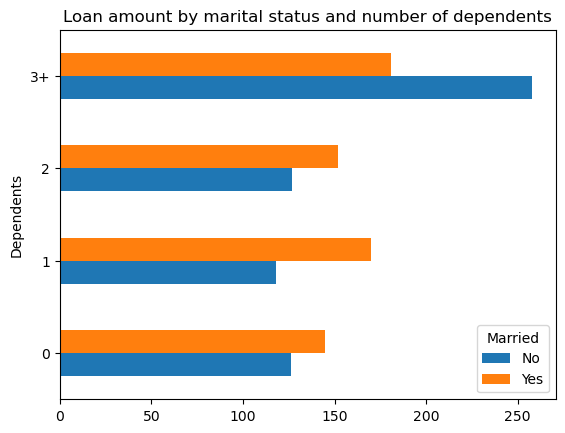

In [26]:
pivot.plot(kind='barh')
plt.title('Loan amount by marital status and number of dependents')

##### Applicant Income + Coapplicant Income by marital status and number of dependents

In [27]:
pivot = np.round(pd.pivot_table(
            df, values='ApplicantIncome',
            index=['Dependents'],
            columns=['Married']
        ) + pd.pivot_table(
            df, values='CoapplicantIncome',
            index=['Dependents'],
            columns=['Married']
        ))

pivot

Married,No,Yes
Dependents,,
0,6086.0,6988.0
1,6790.0,7563.0
2,4934.0,6759.0
3+,12531.0,10299.0


Text(0.5, 1.0, 'Applicant Income + Coapplicant Income by marital status and number of dependents')

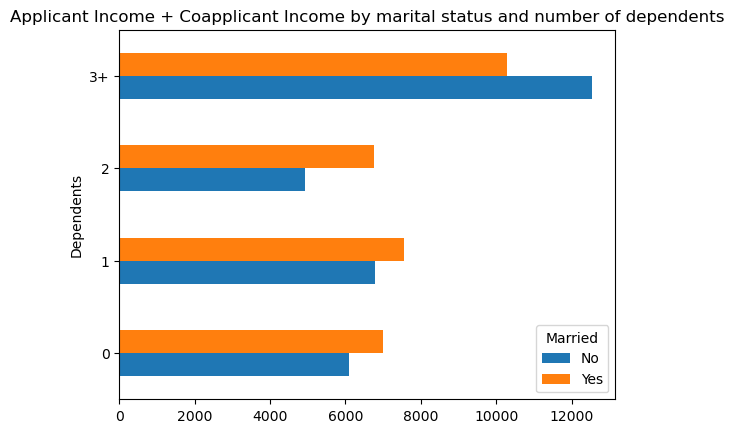

In [28]:
pivot.plot(kind='barh')
plt.title('Applicant Income + Coapplicant Income by marital status and number of dependents')

##### 

In [29]:
pivot = np.round(pd.pivot_table(
            df, values='ApplicantIncome', 
            index=['Married','Education','Self_Employed'], 
            columns=['Property_Area'],
            aggfunc=np.mean
            ))

pivot

Property_Area                        Rural  Semiurban    Urban
Married Education    Self_Employed                            
No      Graduate     No             5292.0     5046.0   4062.0
                     Yes            6339.0     7508.0   9626.0
        Not Graduate No             4047.0     3450.0   2416.0
                     Yes            2583.0     7425.0  11109.0
Yes     Graduate     No             6682.0     5409.0   5860.0
                     Yes            7125.0     8698.0   6597.0
        Not Graduate No             3648.0     3246.0   3523.0
                     Yes            5459.0     3184.0   5510.0

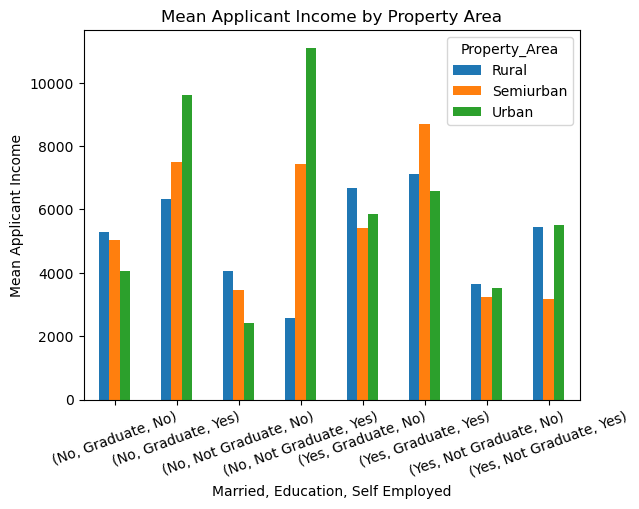

In [30]:
# Plotting the pivot table as a bar graph
pivot.plot(kind='bar')
plt.xlabel('Married, Education, Self Employed')
plt.ylabel('Mean Applicant Income')
plt.title('Mean Applicant Income by Property Area')
plt.xticks(rotation=20)
plt.show()

## 3. Data Cleaning

This step typically involves imputing missing values and treating outliers. 

### Imputing Missing Values

Missing values may not always be NaNs. For instance, the `Loan_Amount_Term` might be 0, which does not make sense.



Impute missing values for all columns. Use the values which you find most meaningful (mean, mode, median, zero.... maybe different mean values for different groups)

In [32]:
mvt.missing_values_table(df)

                   Missing Values  % of Total Values
Loan_ID                         0           0.000000
Gender                         13           2.117264
Married                         3           0.488599
Dependents                     15           2.442997
Education                       0           0.000000
Self_Employed                  32           5.211726
ApplicantIncome                 0           0.000000
CoapplicantIncome               0           0.000000
LoanAmount                     22           3.583062
Loan_Amount_Term               14           2.280130
Credit_History                 50           8.143322
Property_Area                   0           0.000000
Loan_Status                     0           0.000000


In [33]:
mv.clining_missing_values(df)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,0.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900.0,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106.0,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072.0,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583.0,0.0,187.0,360.0,1.0,Urban,Y


In [34]:
#checking if they have a loan  for Loan_Amount_Term if is NaN or 0
df[pd.isna(df['Loan_Amount_Term']) | (df['Loan_Amount_Term'] == 0)][['LoanAmount', 'Loan_Amount_Term']]


,LoanAmount,Loan_Amount_Term
19,115.0,NaN
36,100.0,NaN
44,96.0,NaN
45,88.0,NaN
73,95.0,NaN
112,152.0,NaN
165,182.0,NaN
197,120.0,NaN
223,175.0,NaN
232,120.0,NaN


In [35]:
mvt.missing_values_table(df)

                   Missing Values  % of Total Values
Loan_ID                         0           0.000000
Gender                         13           2.117264
Married                         0           0.000000
Dependents                      0           0.000000
Education                       0           0.000000
Self_Employed                   0           0.000000
ApplicantIncome                 0           0.000000
CoapplicantIncome               0           0.000000
LoanAmount                      0           0.000000
Loan_Amount_Term               14           2.280130
Credit_History                  0           0.000000
Property_Area                   0           0.000000
Loan_Status                     0           0.000000


In [36]:
#drop null values for Gender and Loan_Amount_Term
df.dropna(subset=['Gender', 'Loan_Amount_Term'], inplace=True)

In [37]:
mvt.missing_values_table(df)

                   Missing Values  % of Total Values
Loan_ID                         0                0.0
Gender                          0                0.0
Married                         0                0.0
Dependents                      0                0.0
Education                       0                0.0
Self_Employed                   0                0.0
ApplicantIncome                 0                0.0
CoapplicantIncome               0                0.0
LoanAmount                      0                0.0
Loan_Amount_Term                0                0.0
Credit_History                  0                0.0
Property_Area                   0                0.0
Loan_Status                     0                0.0


In [38]:
# data sctructure
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,587.000000,587.000000,587.000000,587.000000,587.000000
mean,5324.616695,1622.062896,140.269165,342.010221,0.780239
std,5856.262235,2972.479063,86.291409,65.428333,0.414438
min,150.000000,0.000000,0.000000,12.000000,0.000000
25%,2885.500000,0.000000,98.000000,360.000000,1.000000
50%,3814.000000,1131.000000,125.000000,360.000000,1.000000
75%,5790.000000,2279.000000,164.500000,360.000000,1.000000
max,81000.000000,41667.000000,650.000000,480.000000,1.000000


In [39]:
# chack duplicates
len(df) - len(df.drop_duplicates())

0

### Extreme values
Try a log transformation to get rid of the extreme values in `LoanAmount`. Plot the histogram before and after the transformation

Text(0.5, 0, 'Loan Amount')

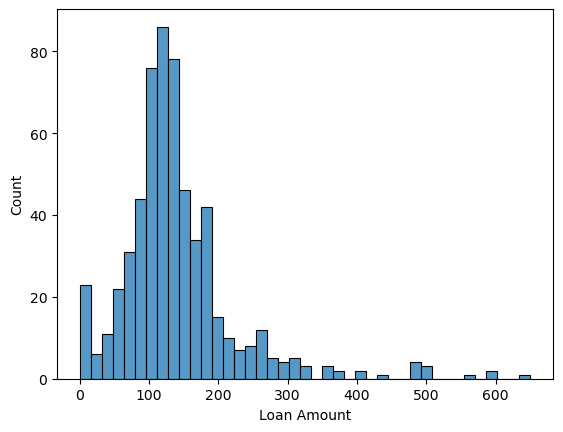

In [40]:
# Before log transformation
sns.histplot(df['LoanAmount'])
plt.xlabel('Loan Amount')

Text(0.5, 0, 'Log Loan Amount')

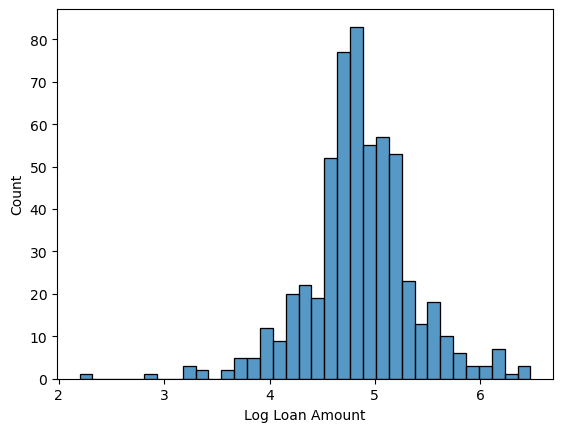

In [41]:
# After log transformation
log_scale = np.log(df['LoanAmount'])

sns.histplot(log_scale)
plt.xlabel('Log Loan Amount')

Combine both incomes as total income and take a log transformation of the same.

Text(0.5, 0, 'Total Income (ApplicantIncome + CoapplicantIncome)')

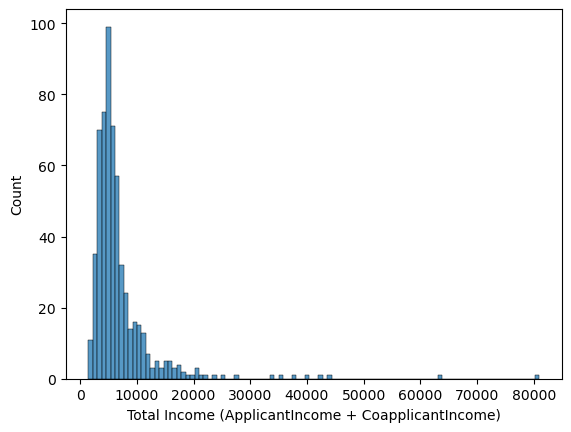

In [42]:
#Feature Engineering
# Create total income column
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']

# Before log transformation
sns.histplot(df['Total_Income'])
plt.xlabel('Total Income (ApplicantIncome + CoapplicantIncome)')


Text(0.5, 0, 'Total Income (ApplicantIncome + CoapplicantIncome)')

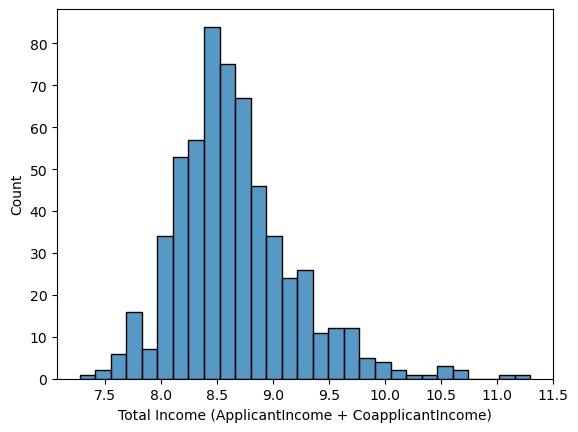

In [43]:
# After log transformation
log_scale_total = np.log(df['Total_Income'])

sns.histplot(log_scale_total)
plt.xlabel('Total Income (ApplicantIncome + CoapplicantIncome)')

#### Feature engineering

In [44]:
#df for pipeline
df_pl = df.copy()

In [45]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,0.0,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y,6000.0


In [46]:
#LoanAmount_per_Total_Income
df["LoanAmount_per_Total_Income"] = round((df["LoanAmount"]/df["Total_Income"])*100,3)


In [47]:
df["Dependents"] = df["Dependents"].replace("3+", 3).astype(int)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,LoanAmount_per_Total_Income
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,0.0,360.0,1.0,Urban,Y,5849.0,0.000
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N,6091.0,2.101
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y,3000.0,2.200
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,2.429
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y,6000.0,2.350


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 587 entries, 0 to 613
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Loan_ID                      587 non-null    object 
 1   Gender                       587 non-null    object 
 2   Married                      587 non-null    object 
 3   Dependents                   587 non-null    int32  
 4   Education                    587 non-null    object 
 5   Self_Employed                587 non-null    object 
 6   ApplicantIncome              587 non-null    float64
 7   CoapplicantIncome            587 non-null    float64
 8   LoanAmount                   587 non-null    float64
 9   Loan_Amount_Term             587 non-null    float64
 10  Credit_History               587 non-null    float64
 11  Property_Area                587 non-null    object 
 12  Loan_Status                  587 non-null    object 
 13  Total_Income        

In [49]:
df["Number_of_Family_Members"] = df["Dependents"] + 1 + (df["CoapplicantIncome"] > 0).astype(int)

In [50]:
#LoanAmount_per_totalincome
df["Total_Income_per_Family_Members"] = np.where(df["Dependents"], round((df["Total_Income"] / df["Number_of_Family_Members"]), 3), df["Total_Income"])

In [51]:
df["LoanAmount_per_Loan_Amount_Term"] = round(df["LoanAmount"]/df["Loan_Amount_Term"]*100,2)

In [52]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,LoanAmount_per_Total_Income,Number_of_Family_Members,Total_Income_per_Family_Members,LoanAmount_per_Loan_Amount_Term
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,0.0,360.0,1.0,Urban,Y,5849.0,0.000,1,5849.000,0.00
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N,6091.0,2.101,3,2030.333,35.56
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y,3000.0,2.200,1,3000.000,18.33
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,2.429,2,4941.000,33.33
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y,6000.0,2.350,1,6000.000,39.17


In [53]:
df.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Total_Income,LoanAmount_per_Total_Income,Number_of_Family_Members,Total_Income_per_Family_Members,LoanAmount_per_Loan_Amount_Term
count,587.000000,587.000000,587.000000,587.000000,587.000000,587.000000,587.000000,587.0000,587.000000,587.000000,587.000000
mean,0.747871,5324.616695,1622.062896,140.269165,342.010221,0.780239,6946.679591,2.2936,2.301533,4811.090160,45.858160
std,1.003989,5856.262235,2972.479063,86.291409,65.428333,0.414438,6270.417398,0.9350,1.131030,4870.726593,52.221604
min,0.000000,150.000000,0.000000,0.000000,12.000000,0.000000,1442.000000,0.0000,1.000000,457.500000,0.000000
25%,0.000000,2885.500000,0.000000,98.000000,360.000000,1.000000,4156.500000,1.8340,1.000000,1927.167000,27.500000
50%,0.000000,3814.000000,1131.000000,125.000000,360.000000,1.000000,5416.000000,2.3820,2.000000,3846.000000,36.110000
75%,1.000000,5790.000000,2279.000000,164.500000,360.000000,1.000000,7452.000000,2.8050,3.000000,5853.500000,50.420000
max,3.000000,81000.000000,41667.000000,650.000000,480.000000,1.000000,81000.000000,8.2710,5.000000,63337.000000,925.000000


In [54]:
print(df.dtypes)

Loan_ID                             object
Gender                              object
Married                             object
Dependents                           int32
Education                           object
Self_Employed                       object
ApplicantIncome                    float64
CoapplicantIncome                  float64
LoanAmount                         float64
Loan_Amount_Term                   float64
Credit_History                     float64
Property_Area                       object
Loan_Status                         object
Total_Income                       float64
LoanAmount_per_Total_Income        float64
Number_of_Family_Members             int32
Total_Income_per_Family_Members    float64
LoanAmount_per_Loan_Amount_Term    float64
dtype: object


In [55]:
df = df.drop(columns=['Loan_ID','Gender','Married','ApplicantIncome','CoapplicantIncome','Dependents','Education','Self_Employed','Property_Area'])
df.head()

,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Total_Income,LoanAmount_per_Total_Income,Number_of_Family_Members,Total_Income_per_Family_Members,LoanAmount_per_Loan_Amount_Term
0,0.0,360.0,1.0,Y,5849.0,0.000,1,5849.000,0.00
1,128.0,360.0,1.0,N,6091.0,2.101,3,2030.333,35.56
2,66.0,360.0,1.0,Y,3000.0,2.200,1,3000.000,18.33
3,120.0,360.0,1.0,Y,4941.0,2.429,2,4941.000,33.33
4,141.0,360.0,1.0,Y,6000.0,2.350,1,6000.000,39.17


In [56]:
y=df[["Loan_Status"]]
X=df.drop("Loan_Status",1)

In [57]:
#Creating dummy variables 
X = pd.get_dummies(X,drop_first=True)

In [58]:
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X = X_scaled

In [59]:
#Splitting the data into train and test sets
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.20, random_state=0)

In [60]:
#LogisticRegression
logistic_model = LogisticRegression(random_state=1)
logistic_model.fit(X_train, y_train)

LogisticRegression(random_state=1)

In [61]:
print(f'Train Accuracy - : {logistic_model.score(X_train,y_train):.3f}')
print(f'Test Accuracy - : {logistic_model.score(X_test,y_test):.3f}')

Train Accuracy - : 0.768
Test Accuracy - : 0.720


In [63]:
# Test set predictions
y_pred_lm = logistic_model.predict(X_test)

In [64]:
print(classification_report(y_test, y_pred_lm))

              precision    recall  f1-score   support

           N       0.68      0.37      0.48        41
           Y       0.73      0.91      0.81        77

    accuracy                           0.72       118
   macro avg       0.71      0.64      0.64       118
weighted avg       0.71      0.72      0.69       118



In [65]:
rfc = RandomForestClassifier(random_state=0)
# fit the model to the training set
rfc.fit(X_train, y_train)

# Predict on the test set results
y_pred = rfc.predict(X_test)

# Check accuracy score 
print('Model accuracy score : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score : 0.6949


In [66]:
# view the feature scores
feature_scores = pd.Series(rfc.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

LoanAmount_per_Total_Income        0.188326
Credit_History                     0.161983
Total_Income                       0.157415
Total_Income_per_Family_Members    0.149102
LoanAmount_per_Loan_Amount_Term    0.134293
LoanAmount                         0.126667
Number_of_Family_Members           0.044242
Loan_Amount_Term                   0.037973
dtype: float64

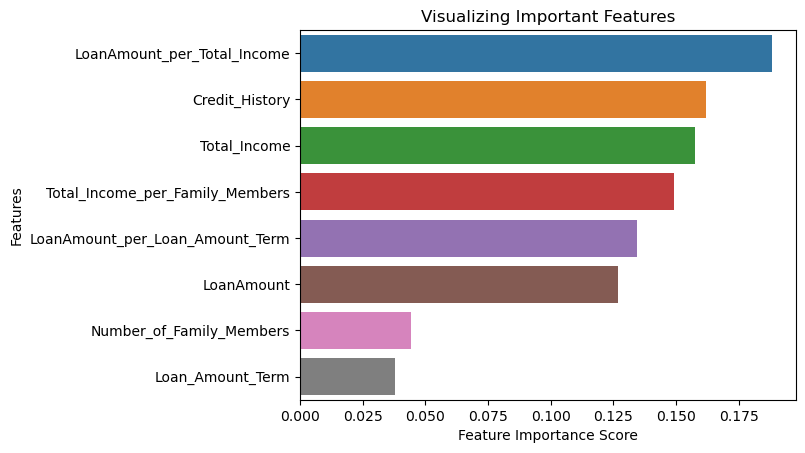

In [67]:
# Creating a seaborn bar plot
sns.barplot(x=feature_scores, y=feature_scores.index)

# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')

# Add title to the graph
plt.title("Visualizing Important Features")

# Visualize the graph
plt.show()

Try paramater grid search to improve the results

In [68]:
from sklearn.model_selection import GridSearchCV

rfc_hp=RandomForestClassifier(random_state=0)
param_grid = { 
     'ccp_alpha': [0.00001,0.0001,0.01,0.0,1.0,10,100],
    'n_estimators': [1,10,100,200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [1,5,10,50]
}
CV_rfc = GridSearchCV(estimator=rfc_hp, param_grid=param_grid, cv= 3)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0),
             param_grid={'ccp_alpha': [1e-05, 0.0001, 0.01, 0.0, 1.0, 10, 100],
                         'max_depth': [1, 5, 10, 50],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [1, 10, 100, 200]})

In [69]:
CV_rfc.best_params_

{'ccp_alpha': 0.01,
 'max_depth': 5,
 'max_features': 'log2',
 'n_estimators': 200}

In [70]:
print(f'Train Accuracy - : {CV_rfc.score(X_train,y_train):.3f}')
print(f'Test Accuracy - : {CV_rfc.score(X_test,y_test):.3f}')

Train Accuracy - : 0.795
Test Accuracy - : 0.720


In [72]:
rfc_hp_al = RandomForestClassifier(ccp_alpha=0.01, max_depth=5, max_features='log2',  n_estimators=200, random_state=0)
# fit the model to the training set
rfc_hp_al.fit(X_train, y_train)

# Predict on the test set results
y_pred = rfc_hp_al.predict(X_test)

# # Check accuracy score 
# print('Model accuracy score : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

In [73]:
print(f'Train Accuracy - : {rfc_hp_al.score(X_train,y_train):.2f}')
print(f'Test Accuracy - : {rfc_hp_al.score(X_test,y_test):.2f}')

Train Accuracy - : 0.80
Test Accuracy - : 0.72


In [74]:
# Print the Confusion Matrix and slice it into four pieces
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)


print(f'Accuracy: {acc}')
print('Confusion matrix\n\n', cm)

Accuracy: 0.7203389830508474
Confusion matrix

 [[15 26]
 [ 7 70]]


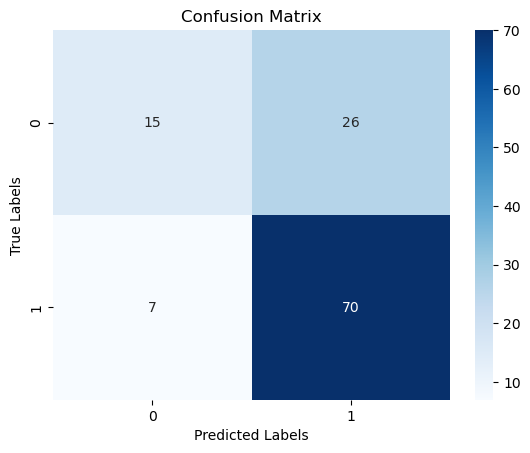

In [75]:
# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## 5. Using Pipeline
If you didn't use pipelines before, transform your data prep, feat. engineering and modeling steps into Pipeline. It will be helpful for deployment.

The goal here is to create the pipeline that will take one row of our dataset and predict the probability of being granted a loan.

`pipeline.predict(x)`

In [119]:
# Pipeline
from sklearn.pipeline import Pipeline 
from sklearn.pipeline import FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer

from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.pipeline import FeatureUnion
from sklearn.feature_selection import SelectKBest

ohe = OneHotEncoder()
le = LabelEncoder()

In [99]:
# Load dataset
df_for_pl = pd.read_csv('../data/data.csv')

In [115]:
# Total_Income column
df_for_pl['Total_Income'] = df_for_pl['ApplicantIncome'] + df_for_pl['CoapplicantIncome']

# Set target variable and independent variables
X= df_for_pl.drop(columns=['Loan_ID', 'Loan_Status'])

y = le.fit_transform(df_for_pl['Loan_Status'])
y = pd.Series(y)


In [117]:
#Splitting the data into train and test sets
X_train1,X_test1,y_train1,y_test1=train_test_split(X, y, test_size=0.20, random_state=0, stratify=y)

In [120]:
# Use column transformer to simplify data preprocessing and feature engineering phases
numeric_transform = Pipeline([('impute_mean', SimpleImputer(strategy='mean')), 
                              ('scaling', StandardScaler())])
categorical_transform = Pipeline([('impute_mode', SimpleImputer(strategy='most_frequent')), 
                                  ('one_hot_encode', OneHotEncoder(sparse=False))])

col_transform = ColumnTransformer([
                                    ('numeric', numeric_transform, ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Total_Income']), 
                                    ('categorical', categorical_transform, ['Gender', 'Married', 'Dependents', 'Education', 
                                                                            'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 
                                                                            'Property_Area'])
                                    ])

# Feature union to simplify feature selection process
feature_union = FeatureUnion([('pca', PCA()), 
                              ('select_best', SelectKBest())])

# Construct pipeline
pipeline = Pipeline(steps=[
                            ('preprocessing', col_transform),
                            ('features', feature_union),
                            ('classifier', RandomForestClassifier())
                            ])

# Find the best hyperparameters using GridSearchCV on the train set
param_grid = {'classifier__ccp_alpha': [0.001, 0.01, 0.1], 
              'features__pca__n_components': [3, 5],
              'features__select_best__k': [1, 3, 6]}
grid = GridSearchCV(pipeline, param_grid=param_grid, cv=3)
grid.fit(X_train1, y_train1)

best_model = grid.best_estimator_
best_hyperparams = grid.best_params_
best_acc = grid.score(X_test1, y_test1)
print(f'Best test set accuracy: {best_acc}\nAchieved with hyperparameters: {best_hyperparams}')

Best test set accuracy: 0.8130081300813008
Achieved with hyperparameters: {'classifier__ccp_alpha': 0.001, 'features__pca__n_components': 3, 'features__select_best__k': 1}


In [139]:
# Predict on the test set results
y_pred_grid = grid.predict(X_test1)

# Print the Confusion Matrix and slice it into four pieces
acc = accuracy_score(y_test1, y_pred_grid)
cm = confusion_matrix(y_test1, y_pred_grid)


print(f'Accuracy: {acc}')
print('Confusion matrix\n\n', cm)

Accuracy: 0.8130081300813008
Confusion matrix

 [[19 19]
 [ 4 81]]


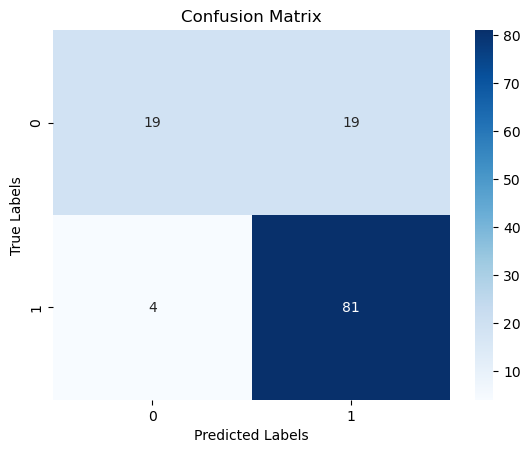

In [140]:
# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [121]:
# Display HTML representation in a jupyter context
from sklearn import set_config
set_config(display='diagram')

pipeline
# pipeline_tips

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('impute_mean',
                                                                   SimpleImputer()),
                                                                  ('scaling',
                                                                   StandardScaler())]),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount',
                                                   'Total_Income']),
                                                 ('categorical',
                                                  Pipeline(steps=[('impute_mode',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one_hot_encode',
                                                                   OneHotEncoder(sparse=False))]),
                                                  ['Gender', 'Married',
                                                   'Dependents', 'Education',
                                                   'Self_Employed',
                                                   'Loan_Amount_Term',
                                                   'Credit_History',
                                                   'Property_Area'])])),
                ('features',
                 FeatureUnion(transformer_list=[('pca', PCA()),
                                                ('select_best',
                                                 SelectKBest())])),
                ('classifier', RandomForestClassifier())])

In [131]:
# Testing the model tunned
X_test_row = X_test1.loc[:, ]
y_pred = grid.predict(X_test_row)
print("Predicted outcome:", y_pred[0:10])

Predicted outcome: [1 1 1 1 1 1 0 1 0 1]


## 6. Deploy your model to cloud and test it with PostMan, BASH or Python

In [138]:
# Import module
import pickle
    
# Saving the model    
pickle.dump(grid, open('../src/model.p', 'wb'))
pickle.dump(X.columns, open('../src/columns.p', 'wb'))